# Notebook 31: Proving NP-completeness using reductions

## The plan

<div class="alert alert-info">
    <p><b>Read</b> page 311.</p>
</div>

We've proven that SAT and 3SAT are NP-complete. Now we turn to other languages, for example, CLIQUE. If we wanted to prove that CLIQUE is NP-hard "from scratch", we'd have to give a polynomial-time reduction from *any* NP language $A$ to CLIQUE:

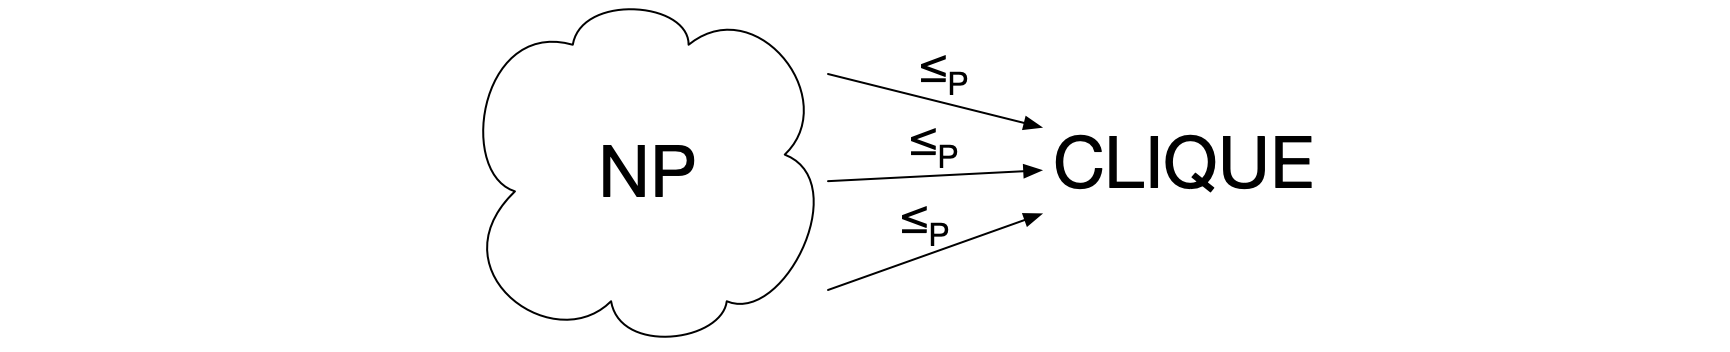

But now that we've proven that 3SAT is NP-complete, our task becomes slightly easier. We no longer have to show a reduction from *every* NP language $A$ to 3SAT; we know that every NP language reduces to 3SAT, so it's enough to show a reduction from 3SAT to CLIQUE, and we automatically get a reduction from every NP language $A$ to CLIQUE:

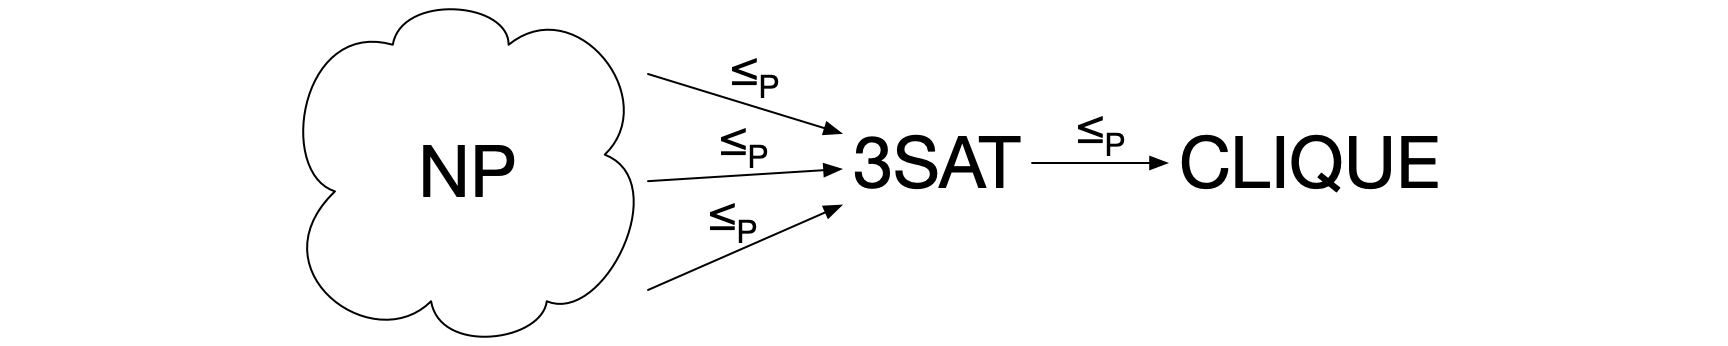

This is possible because polynomial-time reducibility is transitive. Here's a pictorial proof of this fact:

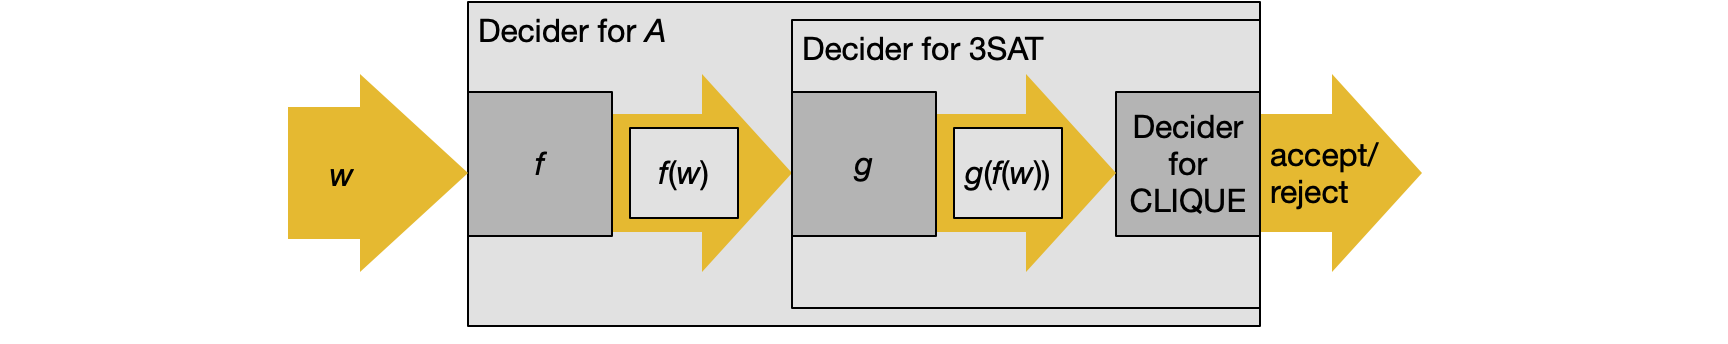

Once we've proven 3SAT NP-complete, we can prove that (say) CLIQUE is NP-complete by giving a reduction from 3SAT to CLIQUE, and so on.

Here's a picture of the reductions proven in the book:

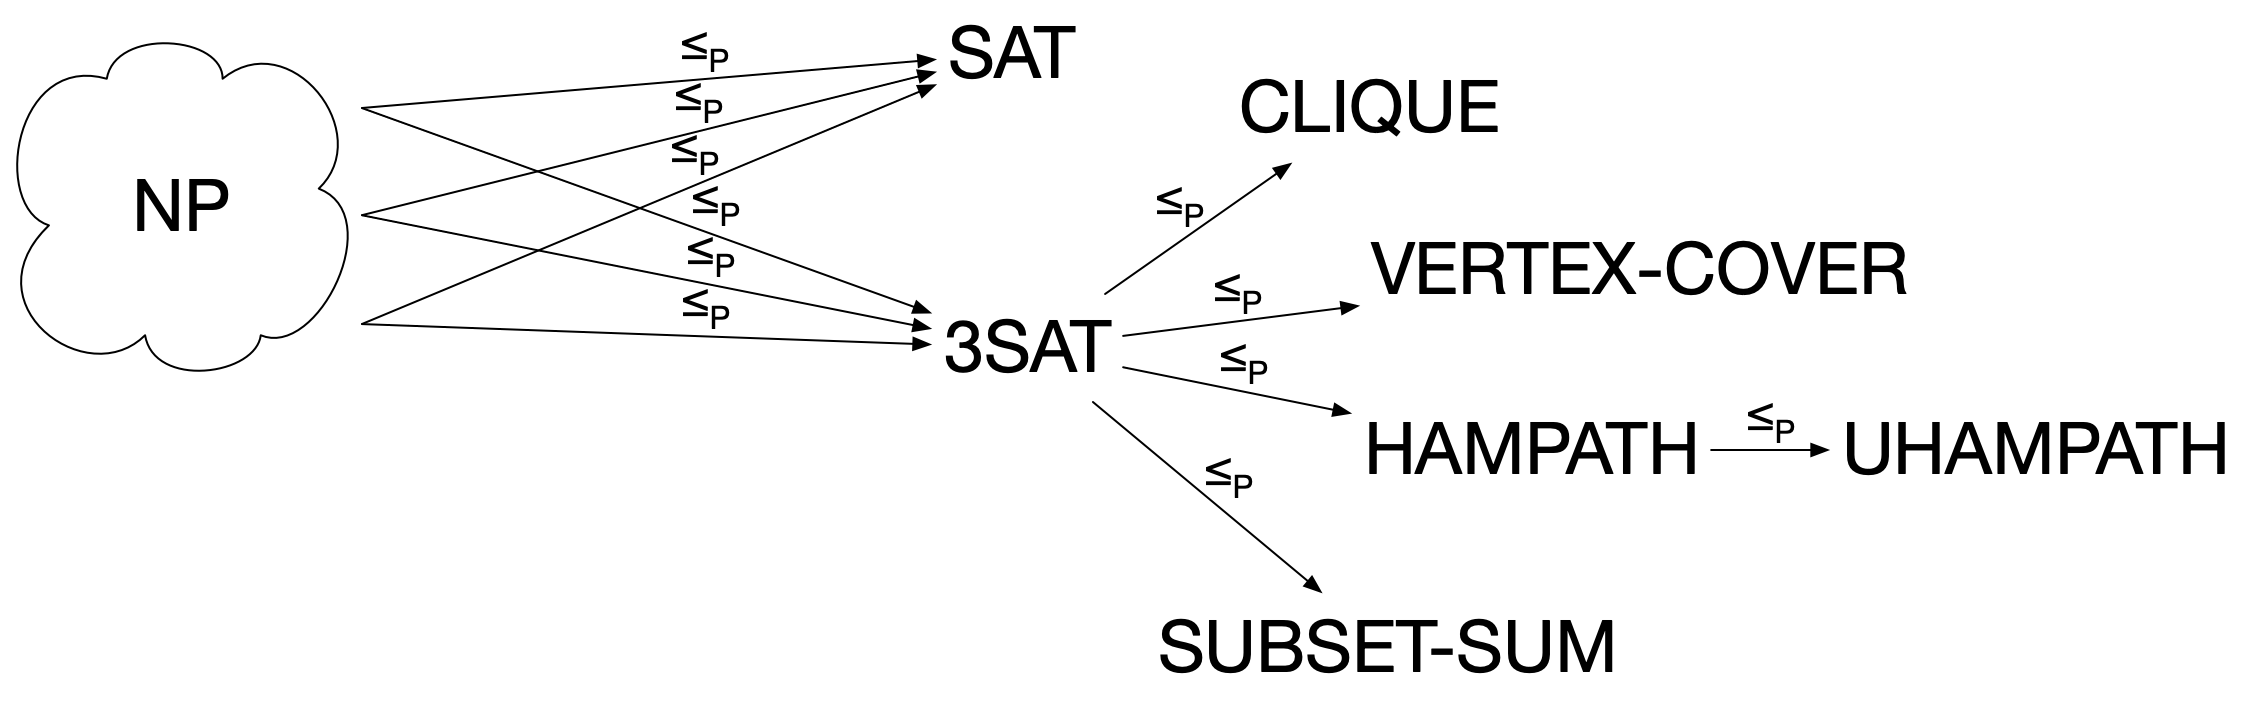

To prove that a language $B$ is NP-complete by reduction from another NP-complete language $A$, you must do the following:

- To prove that $B$ is in NP, you either:
    - Give a polynomial-time deterministic verifier for it, or
    - Give a polynomial-time NTM for it.
- To prove that $B$ is NP-hard, assume that $B$ can be decided in polynomial time by $R$, and construct a polynomial-time decider for $A$: $S={}$"On input $w$, 1. Compute $f(w)$. 2. Run $R$ on $f(w)$. 3. If $R$ accepts, *accept*; else, *reject*."
You fill in:
    - Define a mapping $f$ from instances of $A$ to instances of $B$.
    - Prove that $w \in A$ iff $f(w) \in B$.
    - Prove that $f$ runs in polynomial time.

## Some tips on inventing reductions

I personally find all four of the example reductions in the book difficult. It's not too hard to understand them, but difficult to imagine yourself coming up with them. Below, I try to complement the book's presentations of the reductions with a sketch of the thought process one might go through to arrive at each reduction.

One general fact about 3SAT is that because a satisfying truth-assignment just needs to make at least one literal in each clause true, another way of thinking about the problem is that we need to find a way to choose one literal from each clause -- let's call it the "lucky" literal (I have no idea if there's a standard term for it) -- such that no lucky literals are contradictory (that is, $x$ and $\neg x$ can't both be lucky). In our example formula, there are several ways of choosing the lucky literals:

\begin{gather*}
(x_1 \lor x_1 \lor \underline{x_2}) \land (\underline{\neg x_1} \lor \neg x_2 \lor \neg x_2) \land (\underline{\neg x_1} \lor x_2 \lor x_2) \\
(x_1 \lor x_1 \lor \underline{x_2}) \land (\underline{\neg x_1} \lor \neg x_2 \lor \neg x_2) \land (\neg x_1 \lor \underline{x_2} \lor x_2) \\
(x_1 \lor x_1 \lor \underline{x_2}) \land (\underline{\neg x_1} \lor \neg x_2 \lor \neg x_2) \land (\neg x_1 \lor x_2 \lor \underline{x_2})
\end{gather*}

Most of the reductions in Section 7.5 use this alternative view.

When you start to look for a reduction, here are some questions to think about. They won't necessarily all have answers, but they may help you to come up with ideas.

- The formula $\phi$ becomes the input to the problem.
    - How do you represent the variables? Sometimes there is one "gadget" for each of the $l$ variables.
    - How do you represent the clauses? Usually there is one "gadget" for each clause, encoding which literals appear in each clause.
- Truth-assignments and/or the choice of lucky literals become certificates.
    - How do you represent that a variable is true/false? How do you ensure that a variable isn't true and false at the same time, or neither true nor false?
    - How do you represent that a literal is lucky/unlucky? How do you ensure that each clause has exactly one lucky literal?
    - If you have both of the above, how do you ensure they are consistent with each other?
    - How do you ensure that all clauses are true, or that no lucky literals are contradictory?

## The independent set problem

We're going to do things in a different order than the book. We are going to prove the following reductions:

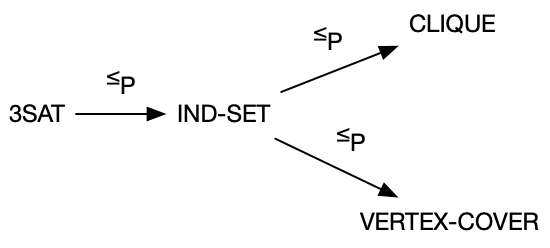

In a graph, an *independent set* is a subset of nodes in which no pair of nodes is connected by an edge. If a graph represents a social network (nodes are people and edges are friendships), then an independent set is a set of people that are all strangers to one another. For example, in this graph:

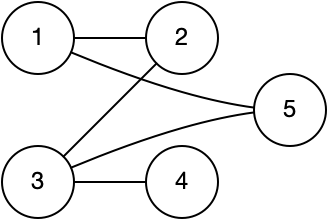


the set {2,4,5} is an independent set, but {1,2,3} is not. The _$k$-independent set_ problem is to decide whether a graph has an independent set of size $k$. More formally, INDEPENDENT-SET (or IND-SET for short) is the set of pairs $\langle G, k\rangle$ where $G$ is a graph and there is a subset of $k$ nodes such that no two nodes are connected by an edge.

Proof that IND-SET is in NP: If $G$ is stored as an adjacency matrix, we can check whether a subset of nodes has size $k$ and has any connected pairs of nodes in $O(k^2)$ time.

Proof that IND-SET is NP-hard: By reduction from 3SAT. We need to show how to convert a 3CNF formula $\phi$ into a graph and a number $k$.

To try to give some idea of the thought process needed to find a reduction (which is different from the way you'd actually write it), I present an

> Interior monologue:
>
> The input to IND-SET is a graph, which has nodes and edges, and $k$. So maybe the variables will become nodes and the clauses edges? Or the variables will become edges and the clauses will become nodes? It's hard to say, so (not just here but in general) I think we will get more traction by thinking about certificates.
>
> The certificates are subsets of $k$ nodes; in other words, a certificate says whether each node is in the subset or not, and there are exactly $k$ in it.
>
> - So maybe nodes could be variables, and a node belongs to the independent set iff the variable is true? But it's not clear why we would want exactly $k$ variables to be true.
>
> - Another idea is to create a node for each variable and its negation. A node $x$ belongs to the independent set if $x$ is true, and node $\neg x$ belongs to the independent set if $x$ is false. Now we want exactly $l$ nodes to be in the independent set. This idea works, but is not enough; we still need a way to represent clauses, and it will turn out that this idea will become unnecessary.
>
> - Maybe nodes could be literals, and a node belongs to the independent set iff the literal is true? As in the first idea, it's not clear why we would want exactly $k$ literals to be true.
>
> - How about if a node belongs to the independent set iff the literal is lucky? This is promising, because we want exactly $m$ literals to be lucky.

For each literal in $\phi$, create a node in the graph $G$, and set $k = m$.

> Here's what our example formula looks like so far. The blue nodes correspond to one possible set of lucky literals.
>
> 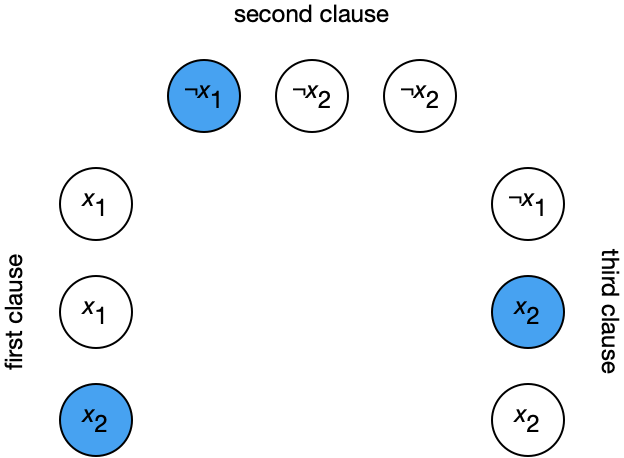
>
> However, this graph has way too many independent sets, because it doesn't have any edges yet.
>
> First, we must ensure that no clause has two lucky literals. We can do this by adding an edge between any nodes belonging to the same clause.
>
> Second, we must ensure that no two lucky literals are contradictory. We can do this by adding edges between any nodes that are contradictory.

Add an edge between all pairs of nodes $u$ and $v$ corresponding to literals in the same clause and between all pairs of nodes $u$ and $v$ corresponding to contradictory literals.

For our example formula, here is the resulting graph:

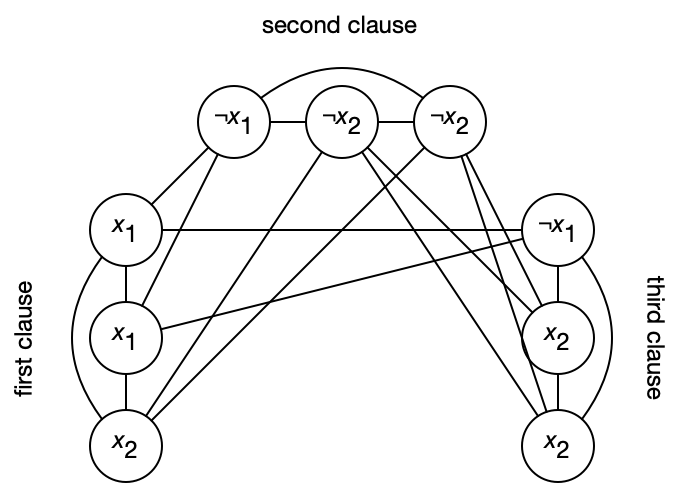

Next, we need to show that $\phi$ is satisfiable iff $G$ has a $k$-independent set. Although we already thought this through, the order was backwards (as is often the case!) from the logical order.

If $\phi$ is satisfiable, there is some choice of $m$ "lucky" literals, one per clause, such that no two lucky literals are contradictory. If we choose the nodes in $G$ corresponding to these literals, then they must form an independent set of size $k=m$. Conversely, for any independent set of $G$ of size $k$, if we choose the corresponding literals to be lucky, there will be one from each clause and non-contradictory, which means that $\phi$ is satisfiable.

In our example graph, here are the three independent sets, corresponding to the three possible sets of lucky literals:

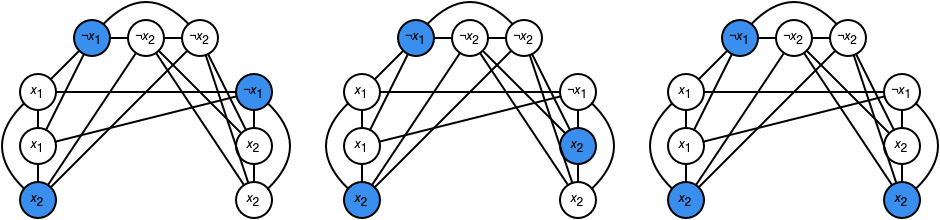

Finally, we need to show that constructing $G$ takes polynomial time. In this case, it's if you simply say this is obvious or (like the book) say nothing.